<a href="https://colab.research.google.com/github/SageCas/Money-Expense-Report/blob/main/Benchmark_6a_Chi_Squared_(Smoking_and_Education).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question:Is there an association between smoking regularly and highest education level?

In [ ]:
import pandas as pd

In [ ]:
pip install researchpy

In [ ]:
import researchpy as rp

In [ ]:

url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,9971993,2,14.26027397,6,7,2008,2288373,373,2,V5.4,...,0,0,0,1,0,0,0,0,4,2
6500,9971993,1,,2,13,2008,2288343,343,1,V5.1,...,0,0,0,0,0,0,0,0,3,2
6501,9971997,1,15.09315068,3,22,2008,2288325,325,1,V5.2,...,0,0,0,0,1,0,0,0,4,3
6502,9971997,2,15.50958904,4,1,2008,2288325,325,2,V5.2,...,0,0,0,0,0,0,0,0,3,2


# **Univariate Statistics**

Codebook 1:
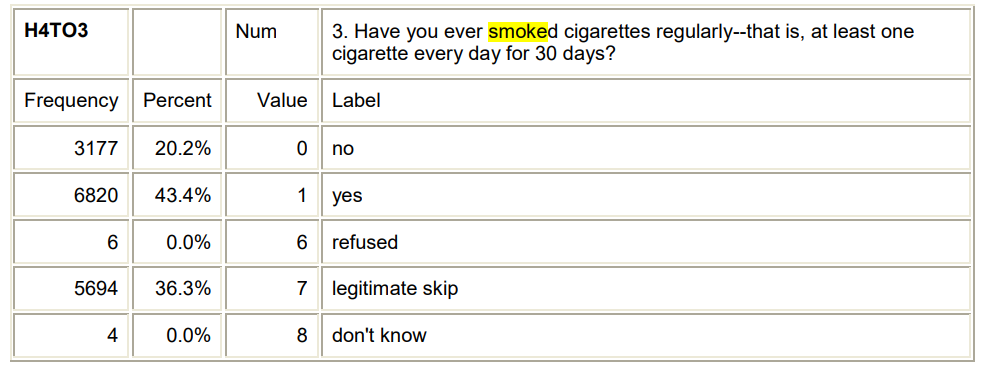


In [ ]:
df['Smoke_Reg'] = df['H4TO3']
df['Smoke_Reg'] = df['Smoke_Reg'].loc[ df['Smoke_Reg'] !=' ' ]
df['Smoke_Reg'] = df['Smoke_Reg'].loc[ df['Smoke_Reg'] !='6' ]
df['Smoke_Reg'] = df['Smoke_Reg'].loc[ df['Smoke_Reg'] !='7' ]
df['Smoke_Reg'] = df['Smoke_Reg'].loc[ df['Smoke_Reg'] !='8' ]
df['Smoke_Reg'].replace( ['0','1'] , ['NO','YES'], inplace=True)
rp.summary_cat(df['Smoke_Reg'])

In [ ]:
df['Smoke_Reg'].value_counts().plot(kind ='pie', autopct='%1.1f%%')

Codebook 2:
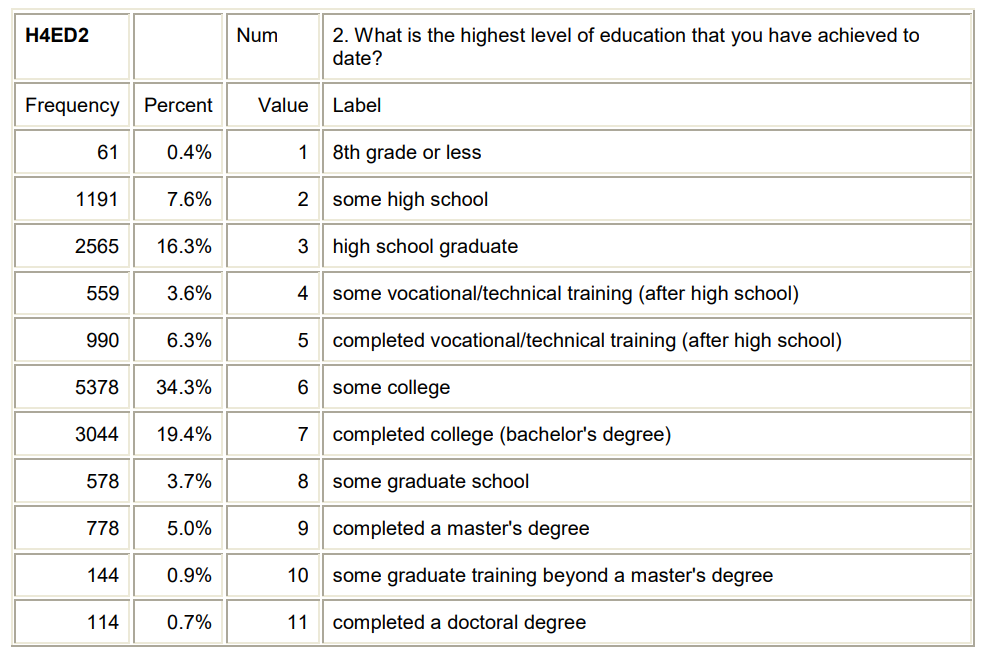

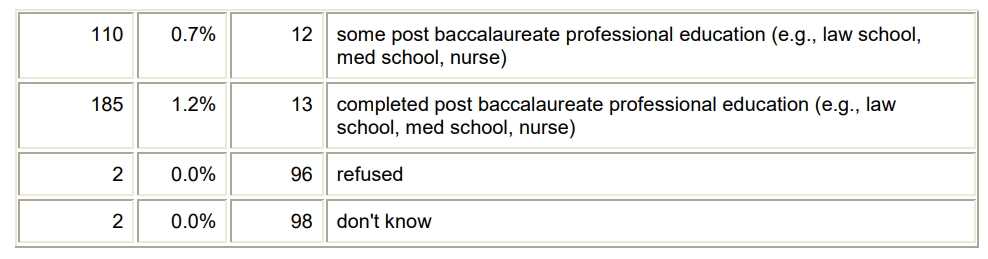


In [ ]:
df['High_ED'] = df['H4ED2']
df['High_ED'] = df['High_ED'].loc[ df['High_ED'] !=' ' ]
df['High_ED'] = df['High_ED'].loc[ df['High_ED'] !='96' ]
df['High_ED'] = df['High_ED'].loc[ df['High_ED'] !='98' ]
df['High_ED'].replace( ['1','2','3','4','5','6','7','8','9','10','11','12','13'],
                      ['No High School diploma','No High School diploma',
                       'High School diploma', 'High School diploma', 'High School diploma','High School diploma',
                       'Bachelors Degree','Bachelors Degree',
                       'Graduate Degree','Graduate Degree','Graduate Degree', 'Graduate Degree', 'Graduate Degree'] , inplace=True)
rp.summary_cat(df['High_ED'])

In [ ]:
df['High_ED'].value_counts(normalize = True).plot(kind = 'bar' , grid=True)

# Bivariate Tables


```



In [ ]:
table = pd.crosstab( df['Smoke_Reg'], df['High_ED'])
table

In [ ]:
#Two way table with Margins
table_margins = pd.crosstab( df['Smoke_Reg'], df['High_ED'], margins=True)
table_margins

In [ ]:
#Two way table with row percents
table_row = pd.crosstab( df['Smoke_Reg'], df['High_ED'],  normalize='index').round(2)
table_row

In [ ]:
#Two way table with columns percents
table_column = pd.crosstab( df['Smoke_Reg'], df['High_ED'],  normalize='columns').round(2)
table_column

# **Bivariate Graphs**

In [ ]:

pd.crosstab( df['Smoke_Reg'], df['High_ED'], normalize=True).plot(kind = 'bar')

In [ ]:
pd.crosstab( df['Smoke_Reg'], df['High_ED'], normalize='index').plot(kind = 'bar' , stacked = True)

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"]=(6, 10)
mosaic(df, ['Smoke_Reg', 'High_ED'] )

# **Chi Squared Test**

In [ ]:
#ResearchPy chi Squared
crosstab, test_results, expected = rp.crosstab(df['Smoke_Reg'], df['High_ED'],test= "chi-square",expected_freqs= True,prop= "cell")


test_results

In [ ]:
expected